# Лабораторная работа 4. Фабарисов Дмитрий. 2 курс АД

In [2]:
import cv2
import skimage.io as sk
import matplotlib.pyplot as plt
import numpy as np
import copy as cp
import skimage.feature as sf
import skimage

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def show_pic(pic_list, name = ['picture']*100, figsize_ = (10, 8)):
    fig = figure(figsize = figsize_)
    for idx in range(len(pic_list)):
        subplot = fig.add_subplot(1, len(pic_list), idx+1)
        sk.imshow(pic_list[idx], cmap = 'gray')
        subplot.set_title(name[idx])

In [4]:
def binarise(pic, koef):
    pic_new = cp.deepcopy(pic)
    pic_new[pic_new >= koef] = 255
    pic_new[pic_new < koef] = 0
    return pic_new

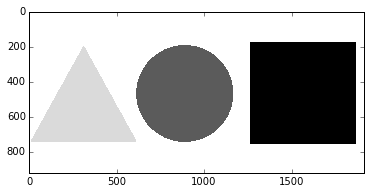

In [5]:
pic = cv2.imread('shad.png')
gray_pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)

sk.imshow(gray_pic)

In [6]:
pic_harris = sf.corner_harris(gray_pic)
pic_corner = sf.corner_peaks(gray_pic)
#show_pic([pic_harris])

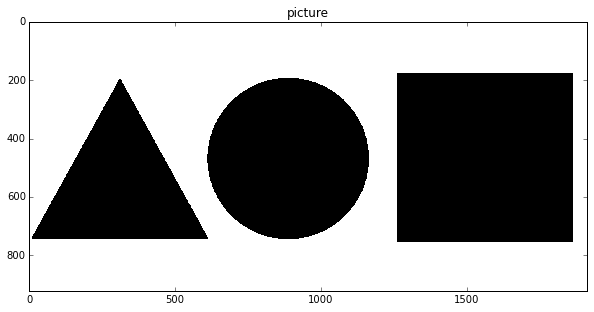

In [7]:
pic_bin = binarise(gray_pic, 250)
show_pic([pic_bin])

### Мы детектим скорее не привычный нам угол, в виде двух лучей, а степень похожести на прямой угол , поэтому чтобы задетектить только углы квадрата просто увеличим порог  

20.2508395121
4


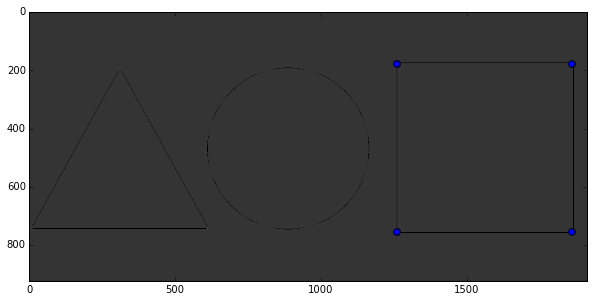

In [8]:
pic_harris = sf.corner_harris(pic_bin)
print np.max(pic_harris)
#pic_corner = sf.corner_peaks(pic_harris, min_distance=5, threshold_abs = 3)
pic_corner = sf.corner_peaks(pic_harris, min_distance=5, threshold_abs = 15)
print len(pic_corner)
plt.figure(figsize = (10, 10))

plt.scatter(pic_corner[:,1], pic_corner[:,0], s = 45)
plt.imshow(pic_harris, cmap = 'gray')
plt.show()

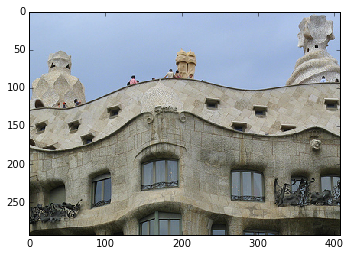

In [9]:

pic = sk.imread('house0.jpg')
gray_pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)

sk.imshow(pic)

### SIFT выделяет высококонтрастные области, с помощью которых можно идентифицировать изображение. На изображении основными являются контуры и области резко отличающиеся по яркости. Такие области собственно и выделил алгоритм.

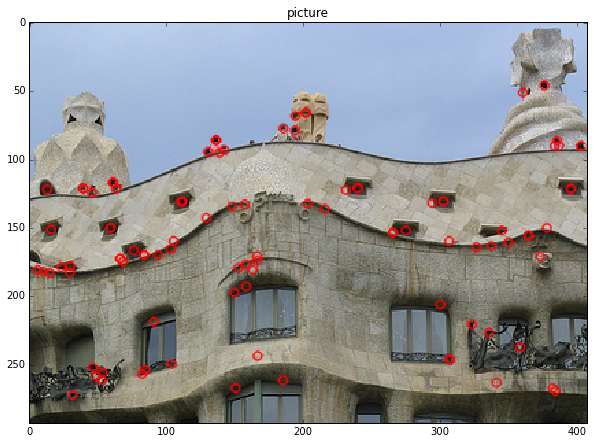

In [10]:
sift = cv2.SIFT(100)

keypoints = sift.detect(pic)
#print keypoints[0].octave
#print help(keypoints[0])
new_pic = cv2.drawKeypoints(pic, keypoints, color = 1000)
show_pic([new_pic])

In [11]:
help(keypoints[0])

Help on KeyPoint object:

class KeyPoint(__builtin__.object)
 |  Methods defined here:
 |  
 |  __repr__(...)
 |      x.__repr__() <==> repr(x)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  angle
 |      angle
 |  
 |  class_id
 |      class_id
 |  
 |  octave
 |      octave
 |  
 |  pt
 |      pt
 |  
 |  response
 |      response
 |  
 |  size
 |      size
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __new__ = <built-in method __new__ of type object>
 |      T.__new__(S, ...) -> a new object with type S, a subtype of T



Properties of cv2.KeyPoint: 

pt - coordinates of the keypoint

size - diameter of the meaningful keypoint neighborhood

angle - computed orientation of the keypoint. range [0,360) degrees.

response - the response by which the most strong keypoints have been selected. Can be used for further sorting or subsampling

octave - octave (pyramid layer) from which the keypoint has been extracted

In [12]:
def drawMatches(img1, kp1, img2, kp2, matches):
    # Create a new output image that concatenates the two images together
    # (a.k.a) a montage
    rows1 = img1.shape[0]
    cols1 = img1.shape[1]
    rows2 = img2.shape[0]
    cols2 = img2.shape[1]

    out = np.zeros((max([rows1,rows2]),cols1+cols2,3), dtype='uint8')
    out[:rows1,:cols1,:] = img1

    out[:rows2,cols1:cols1+cols2,:] = img2

    for mat in matches:

        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx

        # x - columns
        # y - rows
        (x1,y1) = kp1[img1_idx].pt
        (x2,y2) = kp2[img2_idx].pt

        color = (random.randint(0,255),random.randint(0,255),random.randint(0,255))
        cv2.circle(out, (int(x1),int(y1)), 5, color, 2)
        cv2.circle(out, (int(x2)+cols1,int(y2)), 5, color, 2)

        cv2.line(out, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), color, 1)

    # Show the image
    plt.figure(figsize=(16,16))
    plt.xticks(())
    plt.yticks(())
    sk.imshow(out)
    sk.show()
    return

In [13]:
def match_pair(images, best_matches_num=100):
    sift = cv2.SIFT()

    image_descriptors = [sift.detectAndCompute(image, None)[1] for image in images]
    image_keypoints = [sift.detectAndCompute(image, None)[0] for image in images]

    matcher = cv2.BFMatcher()
    best_matches = sorted(matcher.match(image_descriptors[0], image_descriptors[1]), key=lambda x: x.distance)[:best_matches_num]

    return drawMatches(images[0], image_keypoints[0], images[1], image_keypoints[1], best_matches)

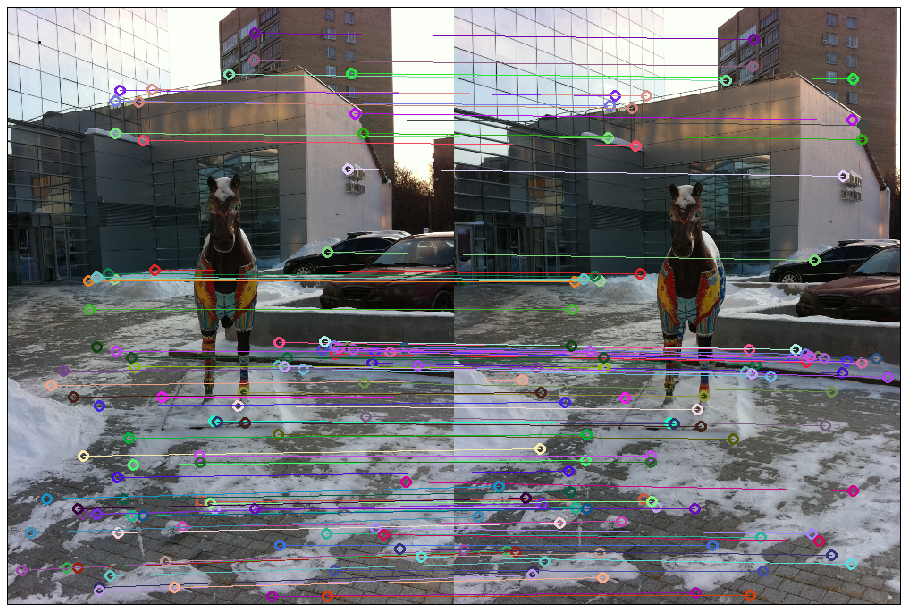

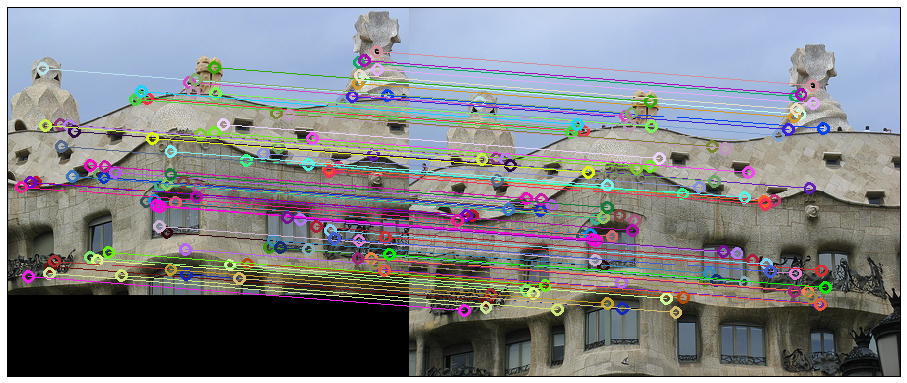

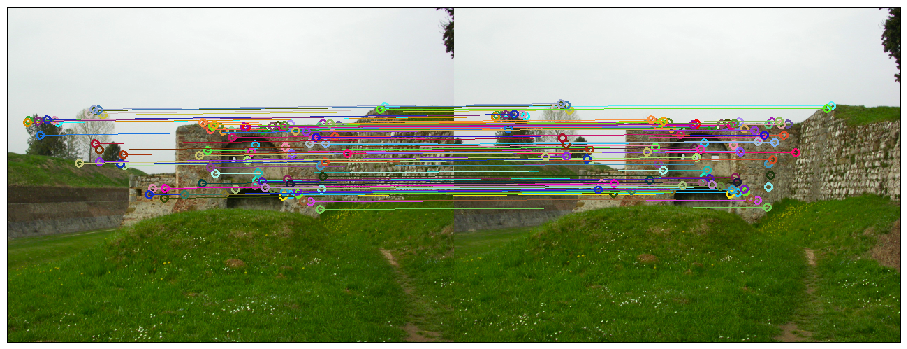

In [14]:
horses = ['horse0.png', 'horse1.png']
forts = ['fort0.png', 'fort1.png']
houses = ['house0.jpg', 'house1.jpg']
images = []

images.append([sk.imread(horses[0], 0), sk.imread(horses[1], 0)])
images.append([sk.imread(houses[0]), sk.imread(houses[1])])
images.append([sk.imread(forts[0]), sk.imread(forts[1])])

pics = map(match_pair, images)


Результаты для house лучшие потому что области здания сильно различаются и на нем нет идентичных особых точек, что способствует хорошему соответствию. 